# Descriptive Statistics Problems

## Notebook set-up


In [1]:
# Import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

## Data loading

In [2]:
# Load IMDb dataset
url = "../data/imdb_1000.csv"
df = pd.read_csv(url)
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.

In [3]:
# Import the add_title_length_features function from our functions module
from functions import add_title_length_features

# Apply the function to our dataset
df = add_title_length_features(df)

# Display the first few rows to verify the new column was created correctly
print("First 10 movies with their title lengths:")
print(df[['title', 'title_length']].head(10))

First 10 movies with their title lengths:
                                           title  title_length
0                       The Shawshank Redemption            24
1                                  The Godfather            13
2                         The Godfather: Part II            22
3                                The Dark Knight            15
4                                   Pulp Fiction            12
5                                   12 Angry Men            12
6                 The Good, the Bad and the Ugly            30
7  The Lord of the Rings: The Return of the King            45
8                               Schindler's List            16
9                                     Fight Club            10


### 1.1 Create Title Length Column

In [4]:
# Calculate mean, median, and mode of the 'title_length' column
# Mean: average title length
title_mean = df['title_length'].mean()

# Median: middle value when title lengths are sorted
title_median = df['title_length'].median()

# Mode: most frequently occurring title length
title_mode = mode(df['title_length'], keepdims=True)

print(f"Mean title length: {title_mean:.2f} characters")
print(f"Median title length: {title_median:.2f} characters")
print(f"Mode title length: {title_mode.mode[0]} characters (appears {title_mode.count[0]} times)")

Mean title length: 15.48 characters
Median title length: 14.00 characters
Mode title length: 12 characters (appears 64 times)


### 1.2 Central Tendency Measures

In [5]:
# Calculate the range, variance, and standard deviation of 'title_length'
# Range: difference between maximum and minimum values
title_range = df['title_length'].max() - df['title_length'].min()

# Variance: average of squared differences from the mean
title_variance = df['title_length'].var()

# Standard deviation: square root of variance (measures spread of data)
title_std = df['title_length'].std()

print(f"Range of title lengths: {title_range} characters")
print(f"Variance of title lengths: {title_variance:.2f}")
print(f"Standard deviation of title lengths: {title_std:.2f} characters")

Range of title lengths: 67 characters
Variance of title lengths: 72.11
Standard deviation of title lengths: 8.49 characters


### 1.3 Measures of Spread

In [6]:
# Calculate skewness and kurtosis of the 'title_length' column
# Skewness: measures asymmetry of the distribution
title_skewness = skew(df['title_length'])

# Kurtosis: measures the "tailedness" of the distribution
title_kurtosis = kurtosis(df['title_length'])

print(f"Skewness of title lengths: {title_skewness:.3f}")
print("Interpretation:", end=" ")

if title_skewness > 0:
    print("Positive skew (right tail is longer)")

elif title_skewness < 0:
    print("Negative skew (left tail is longer)")

else:
    print("Symmetric distribution")

print(f"Kurtosis of title lengths: {title_kurtosis:.3f}")
print("Interpretation:", end=" ")

if title_kurtosis > 0:
    print("Heavy tails (more extreme values than normal distribution)")

elif title_kurtosis < 0:
    print("Light tails (fewer extreme values than normal distribution)")

else:
    print("Similar to normal distribution")

Skewness of title lengths: 1.523
Interpretation: Positive skew (right tail is longer)
Kurtosis of title lengths: 3.787
Interpretation: Heavy tails (more extreme values than normal distribution)


### 1.4 Extreme Values

In [7]:
# Print the shortest and longest title based on their length
# Find the shortest title(s)
min_length = df['title_length'].min()
shortest_titles = df[df['title_length'] == min_length]

# Find the longest title(s)
max_length = df['title_length'].max()
longest_titles = df[df['title_length'] == max_length]

print("SHORTEST TITLE(S):")
print(f"Length: {min_length} characters")

for idx, row in shortest_titles.iterrows():
    print(f"- '{row['title']}'")

print("\nLONGEST TITLE(S):")
print(f"Length: {max_length} characters")

for idx, row in longest_titles.iterrows():
    print(f"- '{row['title']}'")

SHORTEST TITLE(S):
Length: 1 characters
- 'M'

LONGEST TITLE(S):
Length: 68 characters
- 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'


### 1.5 Visualization and Summary

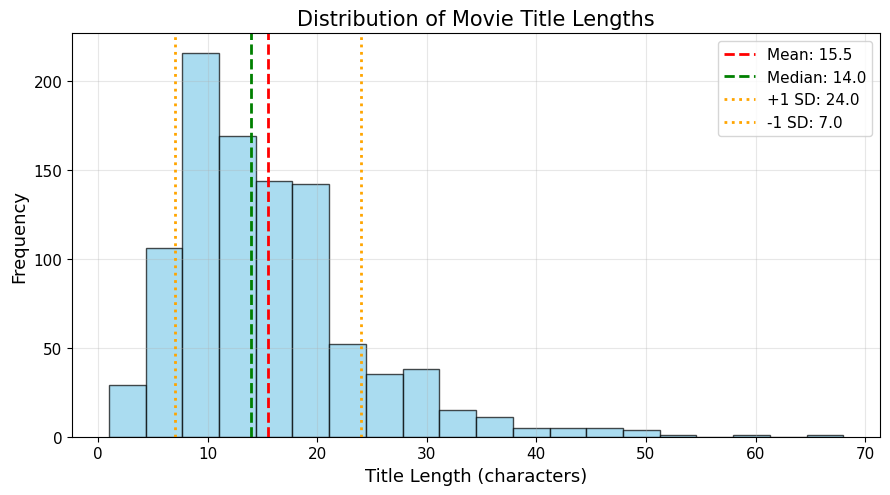

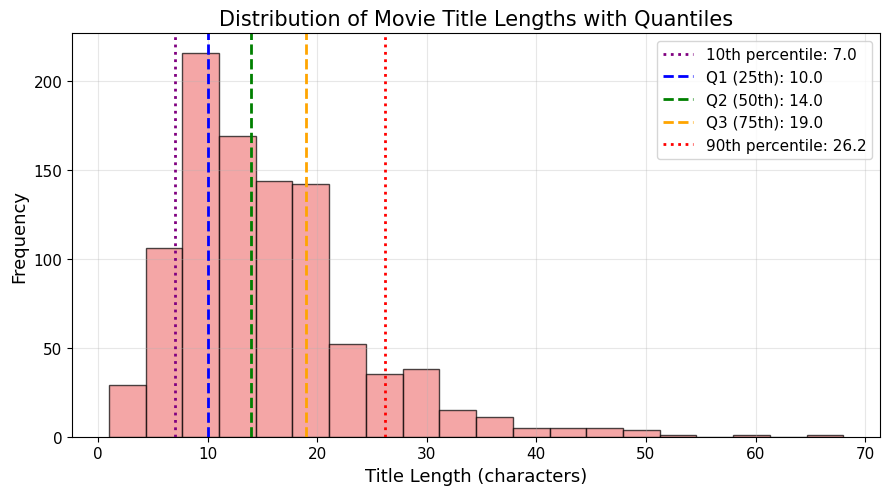


SUMMARY STATISTICS FOR TITLE LENGTHS:
count    979.000000
mean      15.481103
std        8.491569
min        1.000000
25%       10.000000
50%       14.000000
75%       19.000000
max       68.000000
Name: title_length, dtype: float64


In [8]:
# Plot your results
# Create a single histogram showing the distribution of title lengths
# Setting width to match the preview image (900px ≈ 9 inches at 100 DPI)
plt.figure(figsize=(9, 5.06))

# Histogram showing the distribution of title lengths
plt.hist(df['title_length'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('Title Length (characters)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Movie Title Lengths', fontsize=15)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=11)

# Add vertical lines for mean, median, and +/- 1 standard deviation
plt.axvline(title_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {title_mean:.1f}')
plt.axvline(title_median, color='green', linestyle='--', linewidth=2, label=f'Median: {title_median:.1f}')
plt.axvline(title_mean + title_std, color='orange', linestyle=':', linewidth=2, label=f'+1 SD: {title_mean + title_std:.1f}')
plt.axvline(title_mean - title_std, color='orange', linestyle=':', linewidth=2, label=f'-1 SD: {title_mean - title_std:.1f}')
plt.legend(fontsize=11)

plt.tight_layout()

# Save the plot to the assets directory
plt.savefig('../assets/distribution.png', bbox_inches='tight')
plt.show()

# Second plot: Distribution with quantiles
# Create a histogram showing the distribution with common quantiles marked
plt.figure(figsize=(9, 5.06))

# Histogram showing the distribution of title lengths
plt.hist(df['title_length'], bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
plt.xlabel('Title Length (characters)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Movie Title Lengths with Quantiles', fontsize=15)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=11)

# Calculate and add vertical lines for common quantiles
q25 = df['title_length'].quantile(0.25)  # 25th percentile (Q1)
q50 = df['title_length'].quantile(0.50)  # 50th percentile (median/Q2)
q75 = df['title_length'].quantile(0.75)  # 75th percentile (Q3)
q10 = df['title_length'].quantile(0.10)  # 10th percentile
q90 = df['title_length'].quantile(0.90)  # 90th percentile

plt.axvline(q10, color='purple', linestyle=':', linewidth=2, label=f'10th percentile: {q10:.1f}')
plt.axvline(q25, color='blue', linestyle='--', linewidth=2, label=f'Q1 (25th): {q25:.1f}')
plt.axvline(q50, color='green', linestyle='--', linewidth=2, label=f'Q2 (50th): {q50:.1f}')
plt.axvline(q75, color='orange', linestyle='--', linewidth=2, label=f'Q3 (75th): {q75:.1f}')
plt.axvline(q90, color='red', linestyle=':', linewidth=2, label=f'90th percentile: {q90:.1f}')

plt.legend(fontsize=11)
plt.tight_layout()

# Save the quantiles plot to the assets directory
plt.savefig('../assets/quantiles.png', bbox_inches='tight')
plt.show()

# Summary statistics
print("\nSUMMARY STATISTICS FOR TITLE LENGTHS:")
print(df['title_length'].describe())

---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [9]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]
# First, let's look at some sample title lengths from our dataset
print("Sample of title lengths from the dataset:")
sample_titles = df[['title', 'title_length']].head(10)
print(sample_titles)

# Select 5 specific title length values from our dataset
sample_lengths = [df['title_length'].iloc[0], df['title_length'].iloc[1], 
                 df['title_length'].iloc[2], df['title_length'].iloc[3], 
                 df['title_length'].iloc[4]]

print(f"\nSelected 5 title lengths for manual calculation: {sample_lengths}")

Sample of title lengths from the dataset:
                                           title  title_length
0                       The Shawshank Redemption            24
1                                  The Godfather            13
2                         The Godfather: Part II            22
3                                The Dark Knight            15
4                                   Pulp Fiction            12
5                                   12 Angry Men            12
6                 The Good, the Bad and the Ugly            30
7  The Lord of the Rings: The Return of the King            45
8                               Schindler's List            16
9                                     Fight Club            10

Selected 5 title lengths for manual calculation: [np.int64(24), np.int64(13), np.int64(22), np.int64(15), np.int64(12)]


### 2.1 Sample mean

In [10]:
# Calculate the mean of the 5 values
# Mean = sum of all values divided by the number of values
sample_mean = sum(sample_lengths) / len(sample_lengths)

print(f"Values: {sample_lengths}")
print(f"Sum of values: {sum(sample_lengths)}")
print(f"Number of values: {len(sample_lengths)}")
print(f"Mean = {sum(sample_lengths)} / {len(sample_lengths)} = {sample_mean:.2f}")

Values: [np.int64(24), np.int64(13), np.int64(22), np.int64(15), np.int64(12)]
Sum of values: 86
Number of values: 5
Mean = 86 / 5 = 17.20


### 2.2 Calculate Squared Differences

In [11]:
# Calculate the squared differences with respect to the mean
# For each value, calculate: (value - mean)²
squared_differences = []

print("Calculating squared differences:")
print(f"Mean = {sample_mean:.2f}")
print()

for i, value in enumerate(sample_lengths):
    difference = value - sample_mean
    squared_diff = difference ** 2
    squared_differences.append(squared_diff)
    print(f"Value {i+1}: {value}")
    print(f"  Difference from mean: {value} - {sample_mean:.2f} = {difference:.2f}")
    print(f"  Squared difference: ({difference:.2f})² = {squared_diff:.2f}")
    print()

print(f"Squared differences: {[round(float(x), 2) for x in squared_differences]}")
print(f"Sum of squared differences: {sum(squared_differences):.2f}")

Calculating squared differences:
Mean = 17.20

Value 1: 24
  Difference from mean: 24 - 17.20 = 6.80
  Squared difference: (6.80)² = 46.24

Value 2: 13
  Difference from mean: 13 - 17.20 = -4.20
  Squared difference: (-4.20)² = 17.64

Value 3: 22
  Difference from mean: 22 - 17.20 = 4.80
  Squared difference: (4.80)² = 23.04

Value 4: 15
  Difference from mean: 15 - 17.20 = -2.20
  Squared difference: (-2.20)² = 4.84

Value 5: 12
  Difference from mean: 12 - 17.20 = -5.20
  Squared difference: (-5.20)² = 27.04

Squared differences: [46.24, 17.64, 23.04, 4.84, 27.04]
Sum of squared differences: 118.80


### 2.3 Variance and Standard Deviation

In [12]:
# Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation
# Variance = sum of squared differences / number of values
# Standard deviation = square root of variance

# Calculate variance
variance = sum(squared_differences) / len(squared_differences)

# Calculate standard deviation
std_deviation = math.sqrt(variance)

print("MANUAL STANDARD DEVIATION CALCULATION:")
print(f"Sum of squared differences: {sum(squared_differences):.2f}")
print(f"Number of values: {len(squared_differences)}")
print(f"Variance = {sum(squared_differences):.2f} / {len(squared_differences)} = {variance:.2f}")
print(f"Standard deviation = √{variance:.2f} = {std_deviation:.2f}")

print("\nVERIFICATION:")
print(f"Manual calculation: {std_deviation:.2f}")
print(f"NumPy calculation: {np.std(sample_lengths):.2f}")
print(f"Pandas calculation: {pd.Series(sample_lengths).std():.2f}")

# Note: Pandas uses sample standard deviation (n-1) by default, NumPy uses population std (n)
print(f"\nNote: Small differences may occur due to sample vs population standard deviation formulas")

MANUAL STANDARD DEVIATION CALCULATION:
Sum of squared differences: 118.80
Number of values: 5
Variance = 118.80 / 5 = 23.76
Standard deviation = √23.76 = 4.87

VERIFICATION:
Manual calculation: 4.87
NumPy calculation: 4.87
Pandas calculation: 5.45

Note: Small differences may occur due to sample vs population standard deviation formulas
